In [8]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

In [9]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/osptx.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [10]:
# Display top rows
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03 16:00:00,12097.23,12216.76,11955.94,12208.43,162333312
2012-01-04 16:00:00,12189.71,12234.27,12154.04,12226.47,175575328
2012-01-05 16:00:00,12196.24,12253.13,12137.11,12237.40,161562816
2012-01-06 16:00:00,12241.82,12245.99,12148.31,12188.64,144785088
2012-01-09 16:00:00,12194.98,12210.58,12150.68,12196.72,149905296


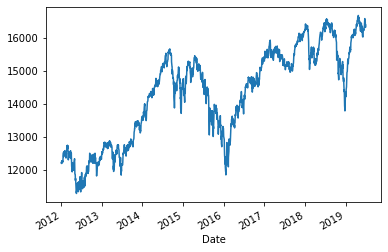

In [11]:
# The series is non-stationary (Trends upwards)
df.Close.plot()

In [12]:
# Transform into a stationary process
df['Return'] = df['Close'].pct_change()
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume,Return
Date,,,,,,
2012-01-04 16:00:00,12189.71,12234.27,12154.04,12226.47,175575328,0.001478
2012-01-05 16:00:00,12196.24,12253.13,12137.11,12237.40,161562816,0.000894
2012-01-06 16:00:00,12241.82,12245.99,12148.31,12188.64,144785088,-0.003985
2012-01-09 16:00:00,12194.98,12210.58,12150.68,12196.72,149905296,0.000663
2012-01-10 16:00:00,12320.66,12346.82,12198.35,12270.66,188406224,0.006062


In [13]:
# Select only the returns
returns = df.loc[:, 'Return']

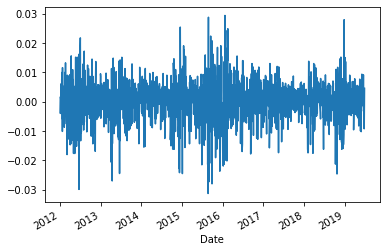

In [14]:
# Stationarity now seen
returns.plot()

# ARMA Model

In [15]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

In [16]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(returns.values, order=(1,1))

In [19]:
# Fit the model to the data
results = model.fit()

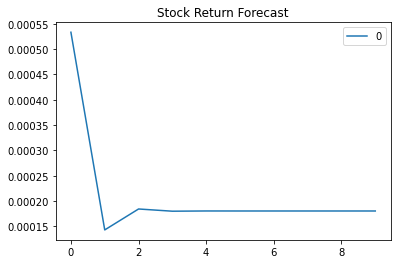

In [11]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Stock Return Forecast")

In [12]:
# Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1880
Model:                     ARMA(1, 1)   Log Likelihood                6700.067
Method:                       css-mle   S.D. of innovations              0.007
Date:                Thu, 09 Jul 2020   AIC                         -13392.134
Time:                        03:49:18   BIC                         -13369.978
Sample:                             0   HQIC                        -13383.973
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.064      0.288      -0.000       0.001
ar.L1.y       -0.1059      0.278     -0.381      0.703      -0.650       0.439
ma.L1.y        0.1861      0.275      0.678      0.498      -0.352       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.4402           +0.0000j            9.4402            0.5000
MA.1           -5.3737           +0.0000j            5.3737            0.5000
-----------------------------------------------------------------------------
"""